
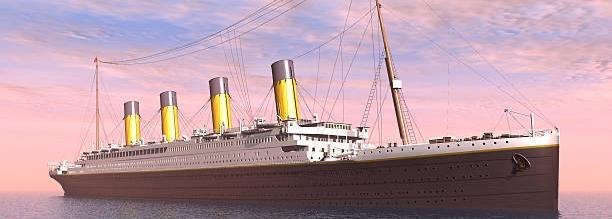

# Titanic - Machine Learning from Disaster
## Overview

This Notebook will be completed in two main ways.<br/>
First, find and visualize useful data or meaningful relationships within the data.<br/>
Second, select a model based on the visualization of the previous process. Transform or refine the data into the appropriate form for the model to be used.<br/><br/>


This competition predicts survival through Survival, Pclass, Sex, Age, ...etc.<br/>
It is the most representative competition of kaggle, and I will complete my notebooks based on my experience of participating in other competitions.

##### "What we need to be careful about here is that we don't have to use all the data to make predictions."<br/>

#### My opinion :
* 1) We think it is important to understand the data well during the competition and to select the necessary data well.
* 2) In addition, the process of preprocessing the data so that the model can learn well is also important.
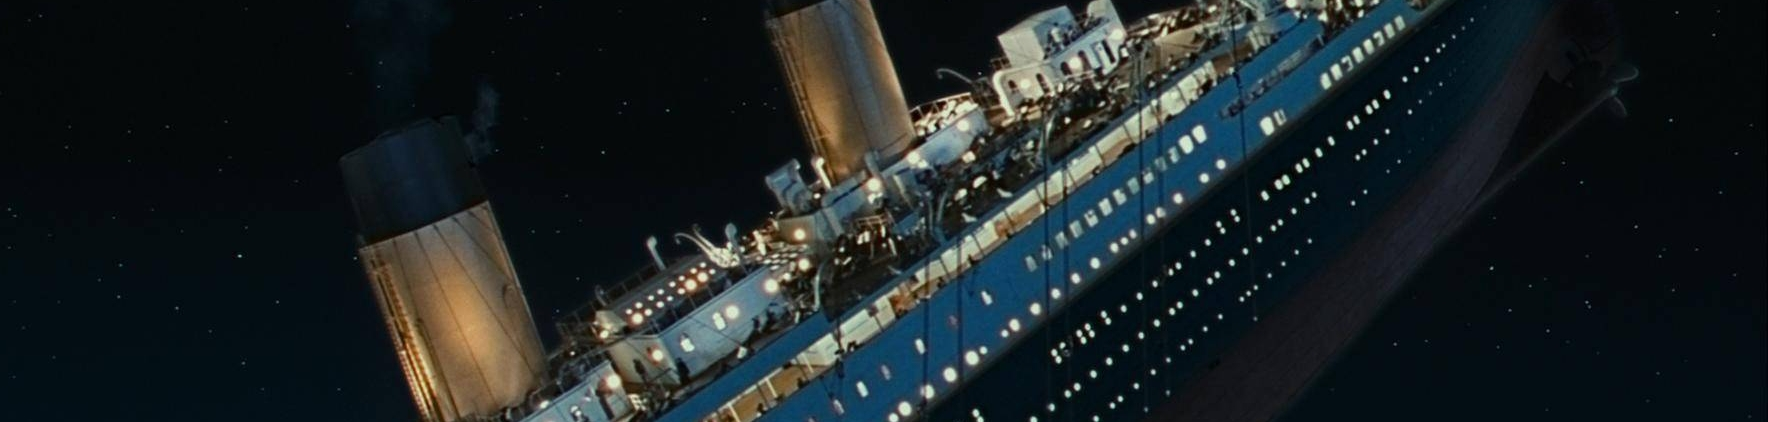

***

## My workflow
#### 1. Import & Install libray
* Import basic libray
* Import enginnering libray

#### 2. Check out my data
* Check Shape / Info / Describe

#### 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Distribution of Survived by Sex
* Plot Crosstab DataFrame ( Survived by Sex | Survived by Pclass )
* Plot relationship Age and Survived with Violin plot 
* Plot the Survived and Pclass per Age with Sex [3d interactive Plot]
* Titanic data Heatmap Plot

#### 4. Prepocessing Data
* Null value preprocessing
* Normalize "Fare" | "Cabin" data
* Drop unuseful columns
* Skeweness Value(Outlier) Preprocessing

#### 5. Feature Enginnering 
* OneHot Encoding
* Split Train data / Test data

#### 6. Modeling
* LogisticRegression Modeling
* DecisionTreeClassifier Modeling (with GridSearchCV / CrossValScore)
* RandomForestClassifier Modeling (with GridSearchCV)
* LGBMClassifier Modeling (with GridSearchCV)
* Select Model

#### 7. Submission
* Test data Preprocessing
* Submit the predictions

# 1. Import & Install libray
* Import basic libray
* Import enginnering libray

In [1]:
import os
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

In [2]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('../input/titanic/train.csv')

train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Check out my data
* Check Shape / Info / Describe

In [4]:
print("Titanic train dateset Shape : ", train_df.shape)
print("Titanic test dateset Shape : ", test_df.shape)

Titanic train dateset Shape :  (891, 12)
Titanic test dateset Shape :  (891, 12)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


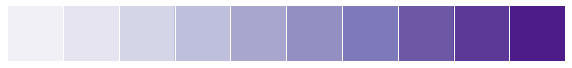

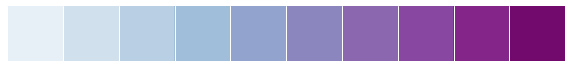

In [7]:
Purples_palette = sns.color_palette("Purples", 10)
BuPu_palette = sns.color_palette("BuPu", 10)
sns.palplot(Purples_palette)
sns.palplot(BuPu_palette)

#### ✔️ This notebook will use this palettes.

# 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Distribution of Survived by Sex
* Plot Crosstab DataFrame ( Survived by Sex | Survived by Pclass )
* Plot relationship Age and Survived with Violin plot 
* Plot the Survived and Pclass per Age with Sex [3d interactive Plot]
* Titanic data Heatmap Plot

### 3-1) Plot the null values

In [8]:
train_df_null_count = pd.DataFrame(train_df.isnull().sum(), columns=["Train Null count"])
test_df_null_count = pd.DataFrame(test_df.isnull().sum(), columns=["Test Null count"])

null_df = pd.concat([train_df_null_count,test_df_null_count],axis=1)
null_df.head(100).style.background_gradient(cmap='Purples')

,Train Null count,Test Null count
PassengerId,0,0
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,177,177
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,0


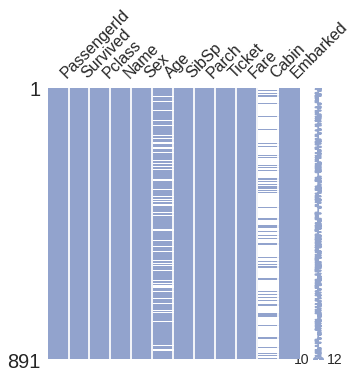

In [9]:
msno.matrix(df=train_df.iloc[:,:],figsize=(5,5),color=BuPu_palette[4])
plt.show()

### 3-2) Plot the Distribution of Survived by Sex

In [10]:
Purples_palette_two = [Purples_palette[3], Purples_palette[6]]

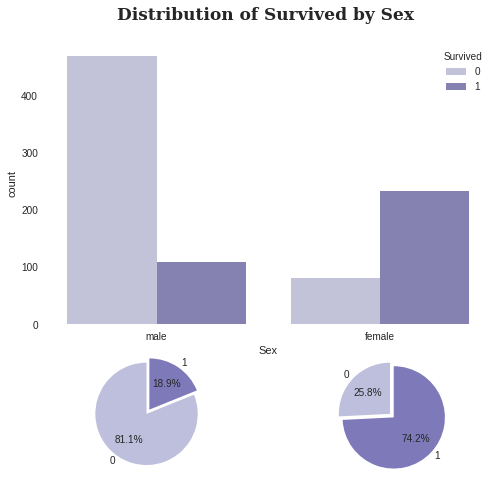

In [11]:
fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(3, 2)


ax_sex_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Sex',hue='Survived', data=train_df, ax=ax_sex_survived, 
              palette=Purples_palette_two)

# ax_survived_sex.set_yticks([])

ax_pie_male = fig.add_subplot(gs[2, 0])
ax_pie_female = fig.add_subplot(gs[2, 1])
# Sex
male = train_df[train_df['Sex']=='male']['Survived'].value_counts().sort_index()
ax_pie_male.pie(male, labels=male.index, autopct='%1.1f%%',explode = (0, 0.1), startangle=90,
               colors=Purples_palette_two
               )

female = train_df[train_df['Sex']=='female']['Survived'].value_counts().sort_index()
ax_pie_female.pie(female, labels=female.index, autopct='%1.1f%%',explode = (0, 0.1), startangle=90,
                colors=Purples_palette_two
                 )

fig.text(0.25,0.92,"Distribution of Survived by Sex", fontweight="bold", fontfamily='serif', fontsize=17)

ax_sex_survived.patch.set_alpha(0)

plt.show()

### 3-3) Plot Crosstab DataFrame ( Survived by Sex | Survived by Pclass )

In [12]:
pd.crosstab(train_df['Sex'],train_df['Survived'],margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [13]:
pd.crosstab(train_df['Pclass'],train_df['Survived'],margins=True).style.background_gradient(cmap='BuPu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 3-4) Plot relationship Age and Survived with Violin plot 

In [14]:
BuPu_palette

[(0.9035447904652056, 0.942960399846213, 0.9666897347174164),
 (0.8210841983852365, 0.8820453671664744, 0.9325336409073434),
 (0.7277047289504037, 0.8125951557093425, 0.8942099192618224),
 (0.6302652825836217, 0.7446828143021915, 0.8587773933102653),
 (0.574486735870819, 0.641999231064975, 0.8047673971549404),
 (0.5490196078431373, 0.5273971549404075, 0.7467589388696655),
 (0.5477277970011535, 0.40604382929642446, 0.6876585928489043),
 (0.5359169550173011, 0.2820299884659746, 0.6286043829296425),
 (0.5180469050365244, 0.14571318723567858, 0.5436216839677047),
 (0.4491041906958862, 0.04244521337946944, 0.43277201076509036)]

In [15]:
Purples_palette_two_1 = [Purples_palette[4], Purples_palette[8]]
BuPu_palette_two = [BuPu_palette[2],BuPu_palette[4]]

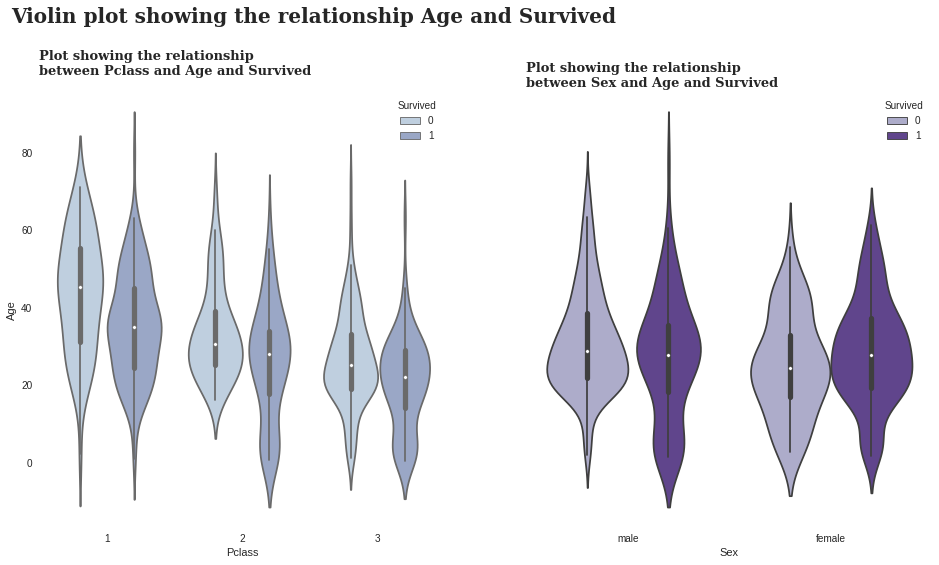

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16,8))


sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, palette=BuPu_palette_two, ax=ax[0])
ax[0].patch.set_alpha(0)
ax[0].text(-0.5,100,"Plot showing the relationship \nbetween Pclass and Age and Survived", fontweight="bold", fontfamily='serif', fontsize=13)


sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, palette=Purples_palette_two_1, ax=ax[1])
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].patch.set_alpha(0)
ax[1].text(-0.5,100,"Plot showing the relationship \nbetween Sex and Age and Survived", fontweight="bold", fontfamily='serif', fontsize=13)

fig.text(0.1,1,"Violin plot showing the relationship Age and Survived", fontweight="bold", fontfamily='serif', fontsize=20)
plt.show()

In [17]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3-5) Plot the Survived and Pclass per Age with Sex [3d interactive Plot]

In [18]:
fig = px.scatter_3d(train_df[:1000], x='Age', y='Survived', z='Pclass',color='Age')
fig.show()

### 3-6) Titanic data Heatmap Plot

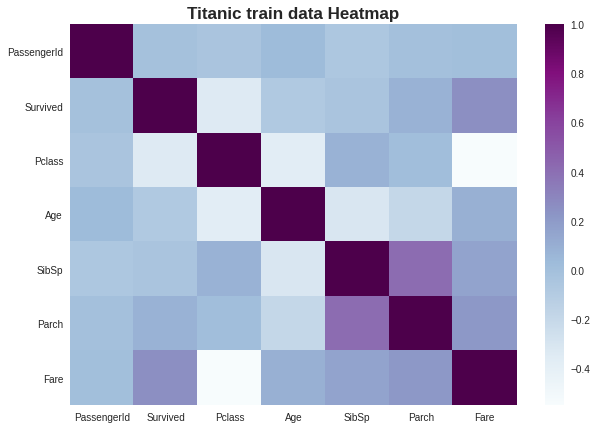

In [19]:
corr = train_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='BuPu')
plt.title("Titanic train data Heatmap", fontweight="bold", fontsize=17)
plt.show()

# 4. Prepocessing Data
* Null value preprocessing
* Normalize "Fare" | "Cabin" data
* Drop unuseful columns
* Skeweness Value(Outlier) Preprocessing

### 4-1) Null value preprocessing

In [20]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Cabin'] = train_df['Cabin'].fillna("N")
train_df['Embarked'] = train_df['Embarked'].fillna("N")

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


### 4-2) Normalize "Fare" | "Cabin" data

In [22]:
train_df.loc[train_df["Fare"].isnull(),"Fare"] = train_df["Fare"].mean()
train_df["Fare"] = train_df["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

##### => Takes log transformation for data normalization.

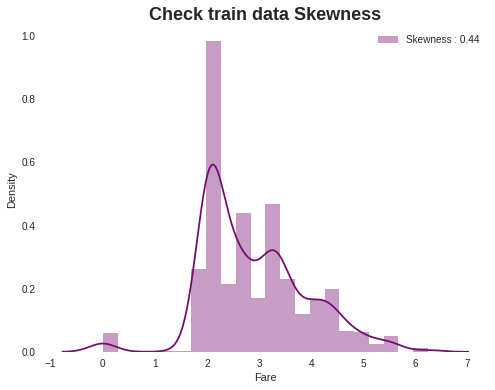

In [23]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.distplot(train_df['Fare'], label='Skewness : {:.2f}'.format(train_df['Fare'].skew()), ax=ax, color=BuPu_palette[-1])
plt.legend(loc='best')
plt.title("Check train data Skewness", fontweight="bold", fontsize=18)
ax.patch.set_alpha(0)
plt.show()

In [24]:
train_df['Cabin'] = train_df['Cabin'].str[:1]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,N,S


### 4-3) Drop unuseful columns

In [25]:
train_df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,1.981001,N,S
1,1,1,female,38.0,1,0,4.266662,C,C
2,1,3,female,26.0,0,0,2.070022,N,S
3,1,1,female,35.0,1,0,3.972177,C,S
4,0,3,male,35.0,0,0,2.085672,N,S


In [26]:
train_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [27]:
Cabin_T_index = train_df[train_df['Cabin']=='T'].index
train_df.drop(Cabin_T_index,inplace=True)

In [28]:
train_df['Embarked'].value_counts()

S    643
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [29]:
Embarked_N_index = train_df[train_df['Embarked']=='N'].index
train_df.drop(Embarked_N_index,inplace=True)

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,1.981001,N,S
1,1,1,female,38.0,1,0,4.266662,C,C
2,1,3,female,26.0,0,0,2.070022,N,S
3,1,1,female,35.0,1,0,3.972177,C,S
4,0,3,male,35.0,0,0,2.085672,N,S


# 5. Feature Enginnering 
* OneHot Encoding
* Split Train data / Test data

### 5-1) OneHot Encoding

In [31]:
train_df = pd.get_dummies(train_df)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,2.070022,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,3.972177,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,2.085672,0,1,0,0,0,0,0,0,0,1,0,0,1


In [32]:
train_df.shape

(888, 19)

### 5-2) Split Train data / Test data

In [33]:
x = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
print("X train data size : {}".format(x_train.shape))
print("Y train data size : {}".format(y_train.shape))
print(" ")
print("X test data size : {}".format(x_test.shape))
print("Y test data size : {}".format(y_test.shape))

X train data size : (710, 18)
Y train data size : (710,)
 
X test data size : (178, 18)
Y test data size : (178,)


# 6. Modeling
* LogisticRegression Modeling
* DecisionTreeClassifier Modeling (with GridSearchCV / CrossValScore)
* RandomForestClassifier Modeling (with GridSearchCV)
* LGBMClassifier Modeling (with GridSearchCV)
* Select Model

### 6-1) LogisticRegression Modeling

In [36]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)
print("Model Accuracy : ", accuracy_score(pred,y_test))

Model Accuracy :  0.8089887640449438


### 6-2) DecisionTreeClassifier Modeling (with GridSearchCV / CrossValScore)

In [37]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print("Model Accuracy : ", accuracy_score(pred,y_test))

Model Accuracy :  0.8314606741573034


In [38]:
param = {'max_depth':[2,4,6,8],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,3,5]
        }
grid = GridSearchCV(dtree,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [39]:
print("DecisionTreeClassifier RGridSearchCV's Best parametes : ")
grid.best_params_

DecisionTreeClassifier RGridSearchCV's Best parametes : 


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [40]:
print("DecisionTreeClassifier RGridSearchCV's Bset score : {}".format(grid.best_score_))

DecisionTreeClassifier RGridSearchCV's Bset score : 0.8153304132546181


In [41]:
scores = pd.DataFrame(grid.cv_results_)
scores[['params','mean_test_score', 'split0_test_score','split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', ]].style.background_gradient(cmap='Purples')

,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
1,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
3,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
4,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
5,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
6,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
7,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 3}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
8,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}",0.772520,0.747191,0.792135,0.780899,0.757062,0.785311
9,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.804069,0.764045,0.825843,0.808989,0.779661,0.841808


In [42]:
score = cross_val_score(dtree, x, y,scoring='accuracy',cv=5)
print("Cross val socre's mean Accuracy : {}".format(score.mean()))

Cross val socre's mean Accuracy : 0.7871770456420999


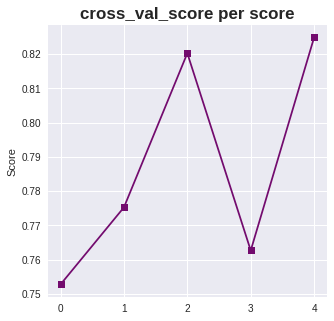

In [43]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(score, 's-',color=BuPu_palette[-1])
ax.set_title("cross_val_score per score", fontweight="bold", fontsize=17)
ax.set_xticks(range(0,5,1))
ax.set_ylabel("Score")
plt.show()

### 6-3) RandomForestClassifier Modeling (with GridSearchCV)

In [44]:
rfc = RandomForestClassifier()

In [45]:
param = {'n_estimators' : [100],
         'max_depth':[10,12,14],
         'min_samples_split':[1,1.5,2],
         'min_samples_leaf':[5,7,9]
        }
rf_grid = GridSearchCV(rfc,param_grid = param,scoring = 'accuracy',cv=5)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 14],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [1, 1.5, 2],
                         'n_estimators': [100]},
             scoring='accuracy')

In [46]:
print("RandomForestClassifier RGridSearchCV's Best parametes : ")
rf_grid.best_params_

RandomForestClassifier RGridSearchCV's Best parametes : 


{'max_depth': 14,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [47]:
print("RandomForestClassifier RGridSearchCV's Bset score : {}".format(rf_grid.best_score_))

RandomForestClassifier RGridSearchCV's Bset score : 0.8183098591549296


In [48]:
scores = pd.DataFrame(rf_grid.cv_results_)
scores[['params','mean_test_score', 'split0_test_score','split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', ]].style.background_gradient(cmap='Purples')

,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 1, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
1,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 1.5, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
2,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}",0.808451,0.795775,0.852113,0.774648,0.781690,0.838028
3,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 1, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
4,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 1.5, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
5,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}",0.808451,0.788732,0.845070,0.774648,0.795775,0.838028
6,"{'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 1, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
7,"{'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 1.5, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan
8,"{'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}",0.812676,0.788732,0.845070,0.781690,0.788732,0.859155
9,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 1, 'n_estimators': 100}",nan,nan,nan,nan,nan,nan


### 6-4) * LGBMClassifier Modeling (with GridSearchCV)

In [49]:
lgbm_x_test, lgbm_x_val, lgbm_y_test, lgbm_y_val = train_test_split(x_test, y_test, test_size=0.5)

In [50]:
model = lgb.LGBMClassifier(n_estimators=5000)

In [51]:
params = {'max_depth': [5, 8, 10],
          'min_child_samples': [ 60, 70, 80],
         'num_leaves' : [5, 8, 10]}

In [52]:
grid = GridSearchCV(model, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='binary_logloss',
         eval_set=[(lgbm_x_val, lgbm_y_val)])

[1]	valid_0's binary_logloss: 0.639595
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.615329
[3]	valid_0's binary_logloss: 0.595898
[4]	valid_0's binary_logloss: 0.580167
[5]	valid_0's binary_logloss: 0.567349
[6]	valid_0's binary_logloss: 0.556672
[7]	valid_0's binary_logloss: 0.547935
[8]	valid_0's binary_logloss: 0.54067
[9]	valid_0's binary_logloss: 0.534791
[10]	valid_0's binary_logloss: 0.530583
[11]	valid_0's binary_logloss: 0.525893
[12]	valid_0's binary_logloss: 0.522651
[13]	valid_0's binary_logloss: 0.519912
[14]	valid_0's binary_logloss: 0.516599
[15]	valid_0's binary_logloss: 0.51302
[16]	valid_0's binary_logloss: 0.511873
[17]	valid_0's binary_logloss: 0.509428
[18]	valid_0's binary_logloss: 0.507854
[19]	valid_0's binary_logloss: 0.506193
[20]	valid_0's binary_logloss: 0.505353
[21]	valid_0's binary_logloss: 0.501639
[22]	valid_0's binary_logloss: 0.50068
[23]	valid_0's binary_logloss: 0.498611
[24]	valid_0's binary_logloss:

GridSearchCV(estimator=LGBMClassifier(n_estimators=5000),
             param_grid={'max_depth': [5, 8, 10],
                         'min_child_samples': [60, 70, 80],
                         'num_leaves': [5, 8, 10]})

In [53]:
print("LGBMClassification GridSearchCV's Best parametes : ")
grid.best_params_

LGBMClassification GridSearchCV's Best parametes : 


{'max_depth': 5, 'min_child_samples': 70, 'num_leaves': 5}

In [54]:
print("LGBMClassification GridSearchCV's Best Score : {}".format(grid.best_score_))

LGBMClassification GridSearchCV's Best Score : 0.8295774647887324


In [55]:
model = lgb.LGBMClassifier(
    n_estimators=1000,
    num_leaves=8,
    max_depth=8,
    min_data=80,
    learning_rate=0.008,
    boosting='gbdt',
    objective='binary',
    metric='binary_logloss',
    n_jobs=-1
)

In [56]:
model.fit(x_train, y_train,
               eval_set=[(lgbm_x_val, lgbm_y_val)],
               early_stopping_rounds=100
               )

[1]	valid_0's binary_logloss: 0.66792
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.665421
[3]	valid_0's binary_logloss: 0.662968
[4]	valid_0's binary_logloss: 0.66056
[5]	valid_0's binary_logloss: 0.658195
[6]	valid_0's binary_logloss: 0.655873
[7]	valid_0's binary_logloss: 0.653593
[8]	valid_0's binary_logloss: 0.651308
[9]	valid_0's binary_logloss: 0.649108
[10]	valid_0's binary_logloss: 0.646902
[11]	valid_0's binary_logloss: 0.644778
[12]	valid_0's binary_logloss: 0.642691
[13]	valid_0's binary_logloss: 0.640595
[14]	valid_0's binary_logloss: 0.63858
[15]	valid_0's binary_logloss: 0.636554
[16]	valid_0's binary_logloss: 0.634606
[17]	valid_0's binary_logloss: 0.632691
[18]	valid_0's binary_logloss: 0.630764
[19]	valid_0's binary_logloss: 0.628913
[20]	valid_0's binary_logloss: 0.627049
[21]	valid_0's binary_logloss: 0.625259
[22]	valid_0's binary_logloss: 0.623461
[23]	valid_0's binary_logloss: 0.62173
[24]	valid_0's binary_logloss: 

LGBMClassifier(boosting='gbdt', learning_rate=0.008, max_depth=8,
               metric='binary_logloss', min_data=80, n_estimators=1000,
               num_leaves=8, objective='binary')

In [57]:
pred = model.predict(lgbm_x_test)
print('Predict test data Accuracy : {:.4f}'.format(accuracy_score(lgbm_y_test, pred)))

Predict test data Accuracy : 0.8652


### 6-5) Select Model
##### => This Notebook will use LGBMClassifier Model

In [58]:
pred = model.predict(x_test)
print('Predict test data Accuracy : {:.4f}'.format(accuracy_score(y_test, pred)))

Predict test data Accuracy : 0.8315


# 7. Submission
* Test data Preprocessing
* Submit the predictions

### 7-1) Test data Preprocessing

In [59]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Cabin'] = test['Cabin'].fillna("N")
test['Embarked'] = test['Embarked'].fillna("N")

In [62]:
test.loc[test["Fare"].isnull(),"Fare"] = test["Fare"].mean()
test["Fare"] = test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

In [63]:
test['Cabin'] = test['Cabin'].str[:1]

In [64]:
test.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [65]:
test = pd.get_dummies(test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,2.057860,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,1,0,1.945910,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,2.270836,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,2.159003,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,2.508582,1,0,0,0,0,0,0,0,0,1,0,0,1


### 7-2) Submit the predictions

In [66]:
test_pred = model.predict(test)

In [67]:
submission['Survived'] = test_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [68]:
submission['Survived'].value_counts()

0    287
1    131
Name: Survived, dtype: int64

In [69]:
submission.to_csv('submission.csv',index=False)

##### reference 
* https://www.kaggle.com/subinium/subin-s-visualization-notebooks-list: EDA part (Visualiztion)
* https://kaggle-kr.tistory.com/32 : EDA part (Visualiztion)
* https://www.kaggle.com/brendan45774/titanic-top-solution : Modeling part


###  If this notebook is useful for your kaggling, "UPVOTE" for it 👀
#### THX to Reading My Notebook🌈